In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cuml import KMeans
from cuml.metrics.cluster import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_dataset.csv")
#remove class label diabetes
df = df.drop(['diabetes'], axis=1)
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90


In [3]:
#function to get race label
def label_race(row):
    if row['race:AfricanAmerican']==1:
        return 'African American'
    if row['race:Asian']==1:
        return 'Asian'
    if row['race:Caucasian']==1:
        return 'Caucasian'
    if row['race:Hispanic']==1:
        return 'Hispanic'
    return 'Other'
df['race_label'] = df.apply(label_race, axis=1)
df = df.drop(['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other'], axis=1)
df.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,race_label
0,2020,Female,32.0,Alabama,0,0,never,27.32,5.0,100,Other
1,2015,Female,29.0,Alabama,0,0,never,19.95,5.0,90,Asian
2,2015,Male,18.0,Alabama,0,0,never,23.76,4.8,160,Other
3,2015,Male,41.0,Alabama,0,0,never,27.32,4.0,159,Caucasian
4,2016,Female,52.0,Alabama,0,0,never,23.75,6.5,90,African American


In [4]:
le = LabelEncoder()
categorical = ['gender', 'location', 'smoking_history', 'race_label']
for variable in categorical:
    df[variable] = le.fit_transform(df[variable])
df.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,race_label
0,2020,0,32.0,0,0,0,4,27.32,5.0,100,4
1,2015,0,29.0,0,0,0,4,19.95,5.0,90,1
2,2015,1,18.0,0,0,0,4,23.76,4.8,160,4
3,2015,1,41.0,0,0,0,4,27.32,4.0,159,2
4,2016,0,52.0,0,0,0,4,23.75,6.5,90,0


In [5]:
cols = df.columns
ms = MinMaxScaler()
df = ms.fit_transform(df)
df = pd.DataFrame(df, columns=[cols])
df.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,race_label
0,0.714286,0.0,0.399399,0.0,0.0,0.0,0.8,0.202031,0.272727,0.090909,1.00
1,0.000000,0.0,0.361862,0.0,0.0,0.0,0.8,0.116013,0.272727,0.045455,0.25
2,0.000000,0.5,0.224224,0.0,0.0,0.0,0.8,0.160481,0.236364,0.363636,1.00
3,0.000000,0.5,0.512012,0.0,0.0,0.0,0.8,0.202031,0.090909,0.359091,0.50
4,0.142857,0.0,0.649650,0.0,0.0,0.0,0.8,0.160364,0.545455,0.045455,0.00


In [9]:
#finding appropriate k for k-means
silhouette_coefficient = []
for i in range(2,31):
    kmeanspp = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeanspp.fit(df)
    silhouette_coefficient.append(silhouette_score(df, kmeanspp.labels_))
    print("k=%d done" % i)

k=2 done
k=3 done
k=4 done
k=5 done
k=6 done
k=7 done
k=8 done
k=9 done
k=10 done
k=11 done
k=12 done
k=13 done
k=14 done
k=15 done
k=16 done
k=17 done
k=18 done
k=19 done
k=20 done
k=21 done
k=22 done
k=23 done
k=24 done
k=25 done
k=26 done
k=27 done
k=28 done
k=29 done
k=30 done


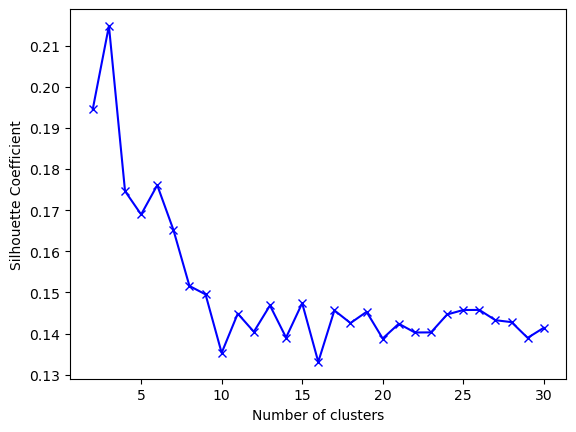

In [10]:
plt.plot(range(2,31), silhouette_coefficient, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [6]:
#determine time taken for k means++
kmeanspp = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init = 10, random_state=0) #4 is best from silhouette coefficient
start_time = time.time()
kmeanspp.fit(df)
end_time = time.time()
end_time-start_time

0.5184938907623291

In [7]:
#sum of squared L2 distance
kmeanspp.inertia_

50313.87951322732

In [11]:
#silhouette coefficient
silhouette_score(df, kmeanspp.labels_)

0.21478218509624203